# **Qiskit Fall Fest Ghana: Challenge Day** 💥

### **Challenge Rules** 

**5 Problem Sets**

1. Sumbmission deadline **1 hour** after starting
2. Submit your completed jupyter notebook here: [Challenge Submission Form](https://forms.gle/XRd5iNS7MH2MjN8H6)
3. You should sign-in to your email before submission would work
4. Work independently, no team work.
5. Your code should match the output
6. How to use the Development environments to execute the task is also part of the challenge

#### **1st Problem: Create and Draw the Circuit**
---
Independently, create and draw a 5-qubit/5-classical bit quantum circuit where you apply the gates listed below, using a loop for the CXs, and measure.

-----------------------------------------
H on qubit 0

CX with qubit 0 as the control and qubit 1 as the target

CX with qubit 1 as the control and qubit 2 as the target

CX with qubit 2 as the control and qubit 3 as the target

CX with qubit 3 as the control and qubit 4 as the target

<br>

----------------------------------------------------
**NOTE: Be careful of going over the number of qubits in the loop.**

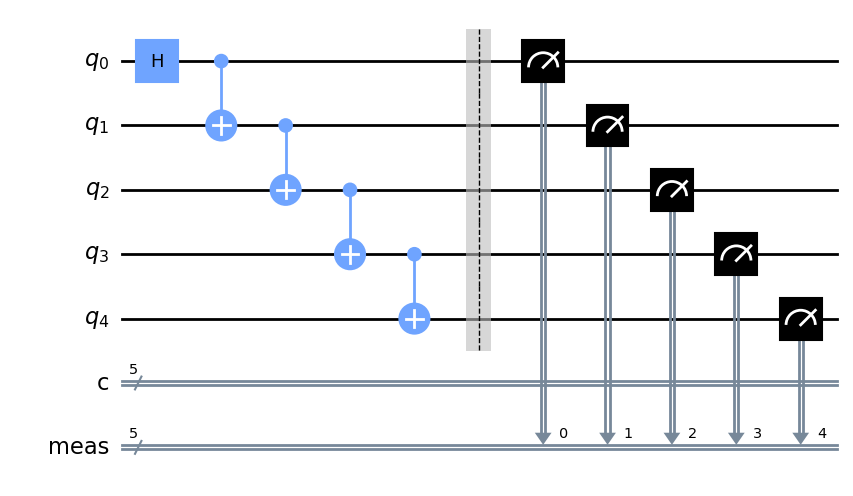

In [11]:
# YOUR CODE HERE
from qiskit import QuantumCircuit

qc = QuantumCircuit(5, 5)


## Write your code below this line ##
qc.h(0)
for i in range(4):
    qc.cx(i,i+1)


## Do not change the code below here ##
qc.measure_all()
qc.draw()

#### **2nd Problem: Read and Apply**
---

There are more advanced gates than the ones we could introduce throughout this week.

Now the purpose of this part of the challenge is to test your ability to **read documentation** and apply that knowledge to construct circuits on your own.

Here's your task

1. Read about the multi-controlled CNOT (`MCXGate`) [Read Here](https://qiskit.org/documentation/apidoc/circuit_library.html)
2. Use that knowledge to construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1HP8EBaXgIFBRY1-FIWDn43ILkiw6MvbH/view?usp=sharing)

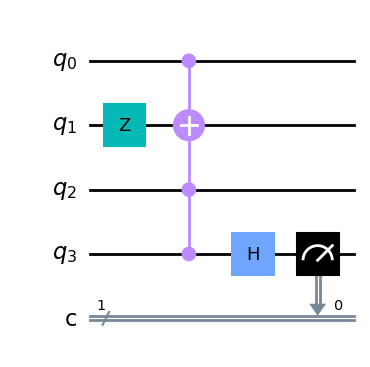

In [30]:
# YOUR CODE HERE
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate

gate = MCXGate(3)

qc = QuantumCircuit(4,1)
qc.z(1)

## Write your code below this line ##

qc.append(gate, [0, 3, 2, 1])


qc.h(3)
## Do not change the code below here ##
qc.measure(3,0)
qc.draw('mpl')

#### **3rd Problem: Surprise Circuit**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1l_xdfMEMQaroihLT_CfINL_K0q_sVZOf/view?usp=sharing)

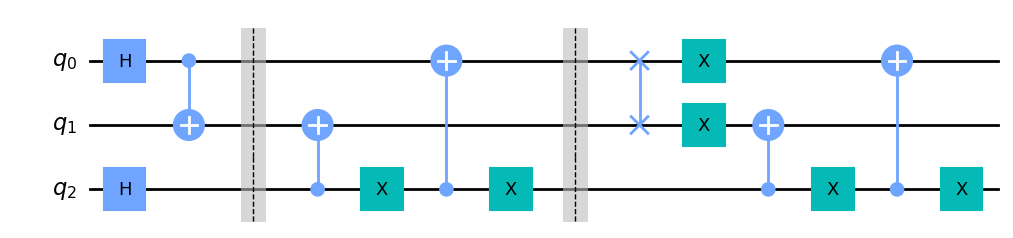

In [31]:
# YOUR CODE HERE

qc = QuantumCircuit(3)


## in the code below, fill in the missing gates. Run the cell to see a drawing of the current circuit ##


qc.h([0,2])

qc.cx(0, 1)

qc.barrier(0, 1, 2)

qc.cx(2,1)

qc.x(2)

qc.cx(2, 0)

qc.x(2)

qc.barrier(0, 1, 2)

qc.swap(0,1)
 
qc.x([0,1])

qc.cx(2, 1)

qc.x(2)

qc.cx(2,0)

qc.x(2)
## Do not change any of the code below this line ##

qc.draw(output="mpl")

#### **4th Problem: Have Fun!**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1DX85EjSMJP4g04ZcROwOECGRsw2kXNDU/view?usp=sharing)

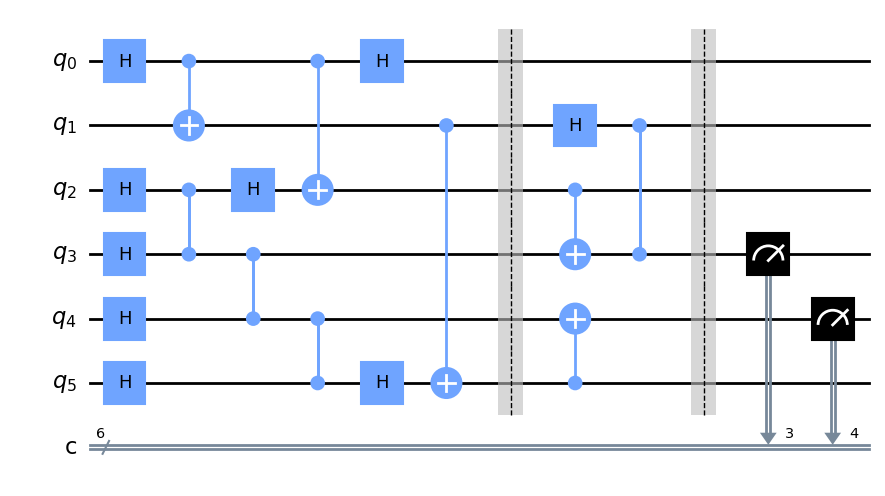

In [54]:
# YOUR CODE HERE

qc = QuantumCircuit(6,6)

qc.h([0,2,3,4,5])
qc.cx(0,1)
qc.cz([2,3,4],[3,4,5])
qc.h(2)
qc.cx(0,2)
qc.h([0,5])
qc.cx(1,5)


qc.barrier([0,1,2,3,4,5])


qc.h(1)


#qc.cx(2,3)
qc.cx(5,4)
qc.cx(2,3)
qc.cz(1,3)

qc.barrier([0,1,2,3,4,5])

qc.measure([3,4],[3,4])

qc.draw(output="mpl")

#### **5th Problem: Have Fun!**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1XkypxqXSVbhcT5tnI9Bygdx3jrbdCnNb/view?usp=sharing)

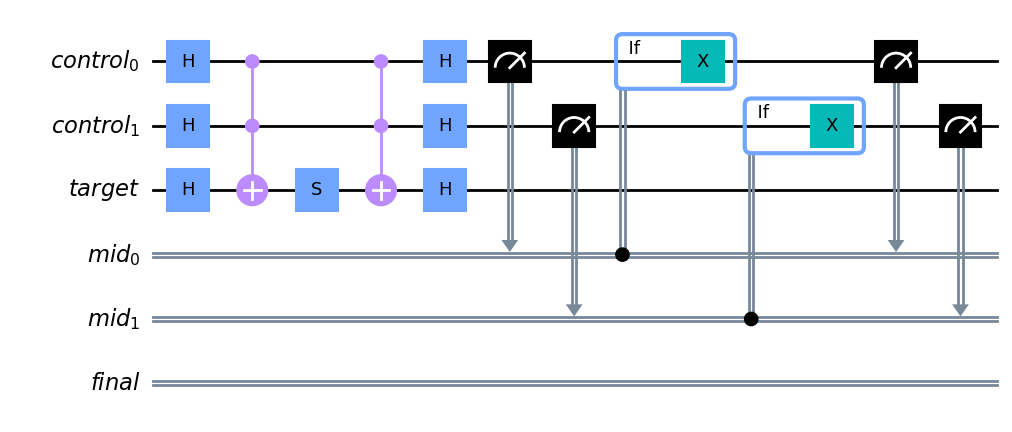

In [73]:
#With functions and named circuits

controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")


mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)
######################################################################################
def trial(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
): 
    control0, control1 = controls
    circuit.h(control0)
    circuit.h(control1)
    circuit.h(target)
    
    
    circuit.ccx(control0,control1,target)
    
    circuit.s(target)
    
    circuit.ccx(control0,control1,target)
    
    circuit.h(control0)
    circuit.h(control1)
    circuit.h(target)
    
    measure0, measure1 = measures
    
    
    circuit.measure(controls, measures)
    with qc.if_test((measure0, 1)) as else_:
        qc.x(control0)
    with qc.if_test((measure1, 1)) as else_:
        qc.x(control1)
        
    qc.measure([control0,control1],[measure0,measure1])
    
    
qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw("mpl")

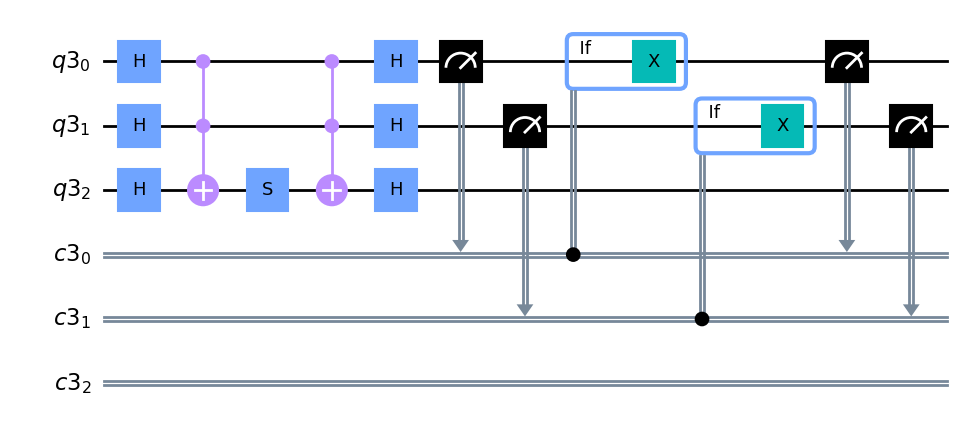

In [63]:
# TWO TYPES OF CODE HERE
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(3, )
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
control0, control1, target = qr
measure0, measure1, measure2 = cr
qc.h([control0, control1,target])
qc.ccx(control0,control1,target)
qc.s(target)
qc.ccx(control0,control1,target)
qc.h([control0, control1,target])
qc.measure([control0,control1],[measure0, measure1])

with qc.if_test((cr[0], 1)) as else_:
        qc.x(qr[0])
with qc.if_test((cr[1], 1)) as else_:
        qc.x(qr[1])

qc.measure([control0,control1],[measure0, measure1])
        
qc.draw("mpl")

---
#### 2023 Qiskit Fall Fest - Ghana: Quantum Computing For Social Good 